***📊 Netflix Customer Data - EDA Assignment***

***🎯 Objective:***
Explore and analyze the Netflix customer dataset to derive insights into user behavior, subscription patterns, and churn tendencies

***📌 2. Assignment Tasks***

***✅ Task 1: Data Overview***

● Display the first 5 rows of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Datasets ML/netflix_customer_churn.csv")

In [3]:
df.head(5)

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


● Check for missing/null values in the dataset.

In [4]:
df.isnull().sum()

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

● Check for unique values in columns like gender, subscription_type, region, etc.

In [5]:
df.nunique()

customer_id               5000
age                         53
gender                       3
subscription_type            3
watch_hours               2343
last_login_days             61
region                       6
device                       5
monthly_fee                  3
churned                      2
payment_method               5
number_of_profiles           5
avg_watch_time_per_day     505
favorite_genre               7
dtype: int64

In [6]:
df.duplicated().sum()

0

***✅ Task 2: Univariate Analys***

● Plot the distribution of:
○ age
○ watch_hours
○ monthly_fee
○ churned (0 = No churn, 1 = Churn)

(array([597., 481., 484., 485., 410., 555., 448., 495., 483., 562.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

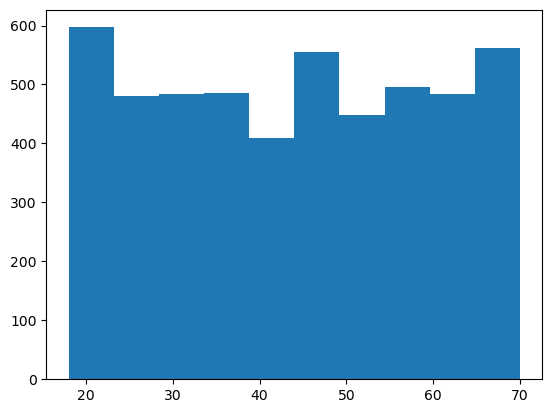

In [7]:
plt.hist(df['age'])

(array([3.081e+03, 1.171e+03, 4.740e+02, 1.430e+02, 8.300e+01, 2.000e+01,
        1.200e+01, 1.100e+01, 3.000e+00, 2.000e+00]),
 array([1.0000e-02, 1.1049e+01, 2.2088e+01, 3.3127e+01, 4.4166e+01,
        5.5205e+01, 6.6244e+01, 7.7283e+01, 8.8322e+01, 9.9361e+01,
        1.1040e+02]),
 <BarContainer object of 10 artists>)

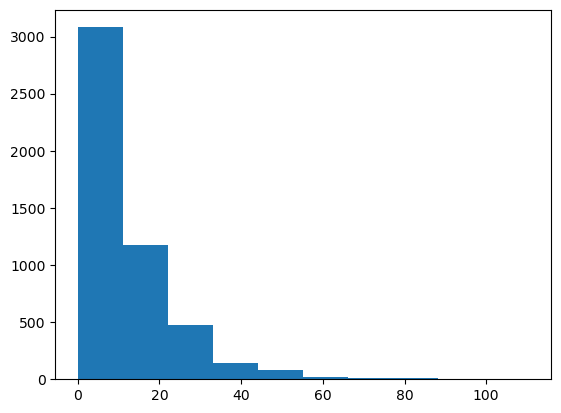

In [8]:
plt.hist(df['watch_hours'])

(array([1661.,    0.,    0.,    0.,    0., 1646.,    0.,    0.,    0.,
        1693.]),
 array([ 8.99,  9.89, 10.79, 11.69, 12.59, 13.49, 14.39, 15.29, 16.19,
        17.09, 17.99]),
 <BarContainer object of 10 artists>)

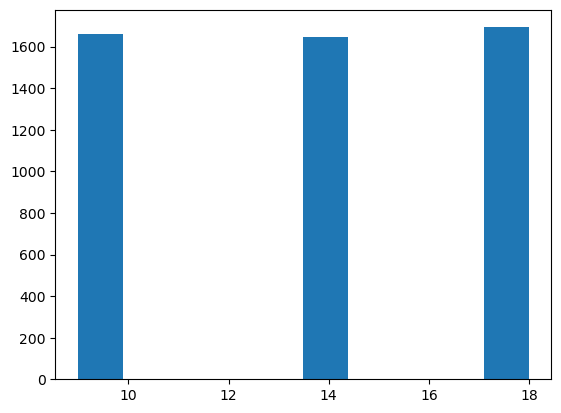

In [9]:
plt.hist(df['monthly_fee'])

churned
1    2515
0    2485
Name: count, dtype: int64

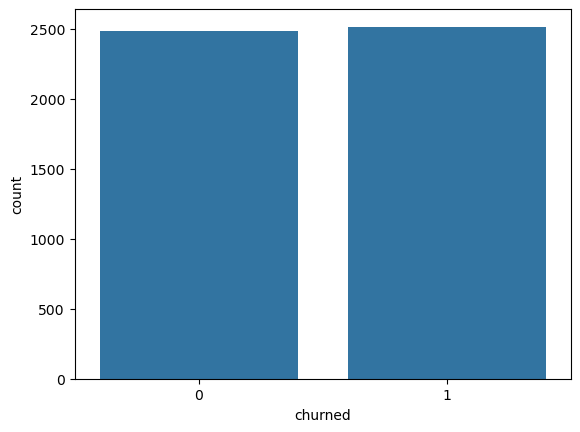

In [10]:
sns.countplot(df,x='churned')
df['churned'].value_counts()

● Count plots for categorical variables:
○ subscription_type
○ gender
○ region
○ device
○ payment_method
○ favorite_genre

subscription_type
Premium     1693
Basic       1661
Standard    1646
Name: count, dtype: int64

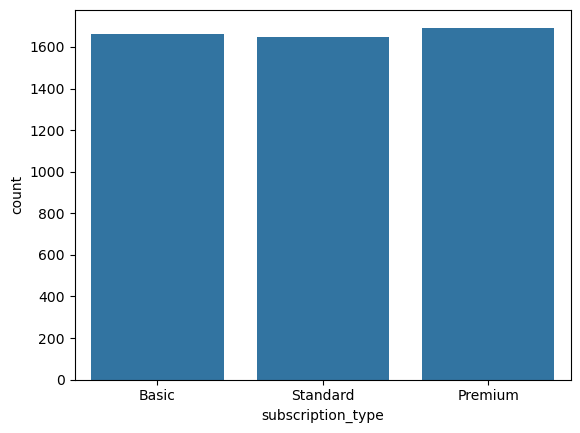

In [11]:
sns.countplot(df,x = 'subscription_type')
df['subscription_type'].value_counts()

gender
Female    1711
Male      1654
Other     1635
Name: count, dtype: int64

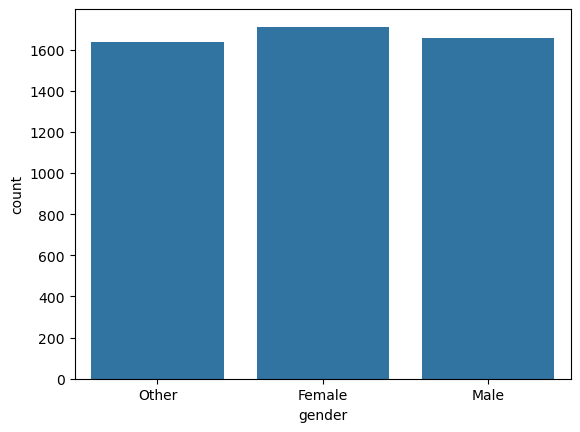

In [12]:
sns.countplot(df,x = 'gender')
df['gender'].value_counts()

region
South America    873
Europe           867
North America    851
Asia             841
Africa           803
Oceania          765
Name: count, dtype: int64

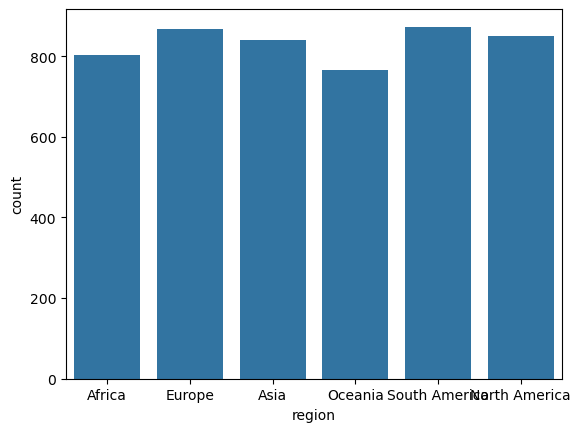

In [13]:
sns.countplot(df,x = 'region')
df['region'].value_counts()

device
Tablet     1048
Laptop     1006
Mobile     1004
TV          993
Desktop     949
Name: count, dtype: int64

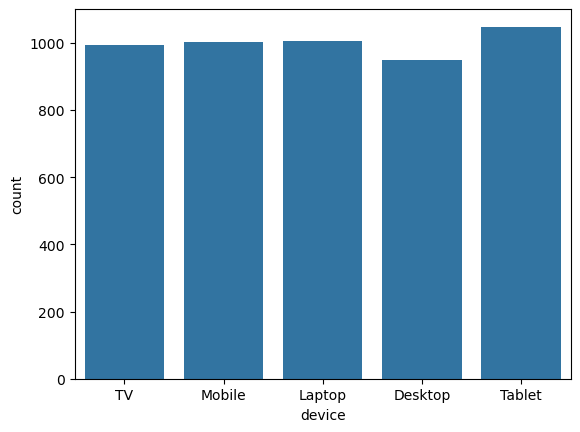

In [14]:
sns.countplot(df,x = 'device')
df['device'].value_counts()

payment_method
Debit Card     1030
PayPal         1026
Crypto          995
Gift Card       976
Credit Card     973
Name: count, dtype: int64

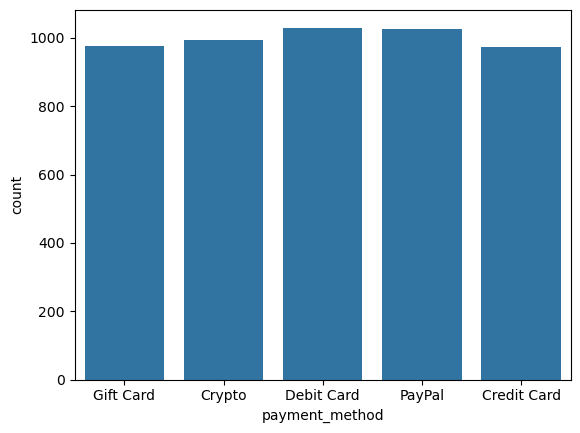

In [15]:
sns.countplot(df,x = 'payment_method')
df['payment_method'].value_counts()

favorite_genre
Drama          731
Documentary    729
Romance        725
Sci-Fi         720
Horror         713
Action         697
Comedy         685
Name: count, dtype: int64

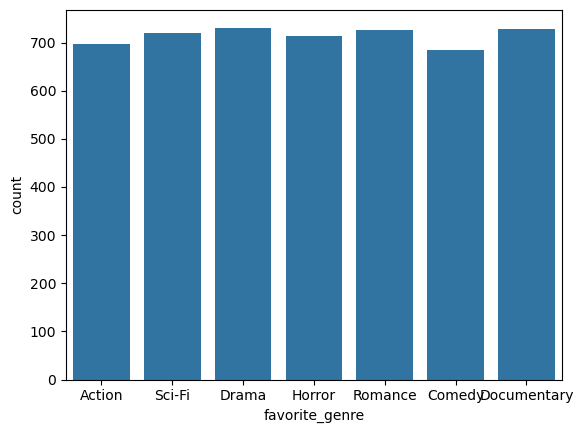

In [16]:
sns.countplot(df,x = 'favorite_genre')
df['favorite_genre'].value_counts()

***✅ Task 3: Bivariate Analysis***

● Compare average watch_hours and monthly_fee across:
○ subscription_type
○ region
○ device

In [17]:
df.groupby('subscription_type')[['watch_hours', 'monthly_fee']].mean()

,watch_hours,monthly_fee
subscription_type,,
Basic,11.563528,8.99
Premium,11.706486,17.99
Standard,11.677491,13.99


In [18]:
df.groupby('region')[['watch_hours', 'monthly_fee']].mean()

,watch_hours,monthly_fee
region,,
Africa,11.667833,13.701083
Asia,11.282652,13.598799
Europe,11.418858,13.685502
North America,11.936557,13.639824
Oceania,11.743111,13.835752
South America,11.852955,13.655521


In [19]:
df.groupby('device')[['watch_hours', 'monthly_fee']].mean()

,watch_hours,monthly_fee
device,,
Desktop,12.382603,13.920453
Laptop,11.273400,13.672903
Mobile,11.961116,13.609522
TV,11.883202,13.594230
Tablet,10.826469,13.634084


● Plot average avg_watch_time_per_day by favorite_genre.

In [20]:
ave = df.groupby('favorite_genre')['avg_watch_time_per_day'].mean()

<Axes: xlabel='favorite_genre'>

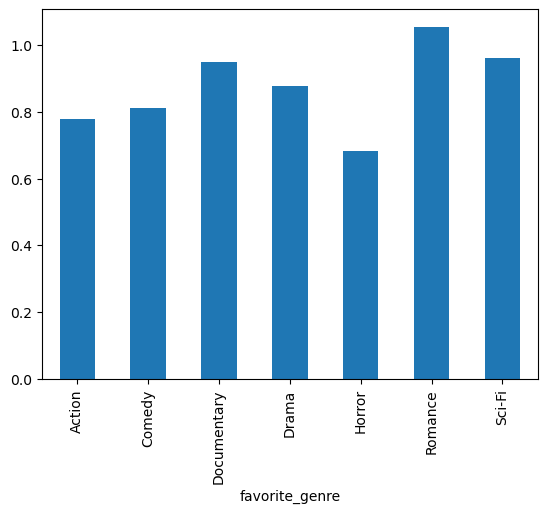

In [21]:
ave.plot(kind='bar')

● Analyze churn rate based on:
○ gender
○ region
○ subscription_type
○ payment_method

In [22]:
pd.crosstab(df['gender'],df['churned'],normalize = 'index')*100

churned,0,1
gender,,
Female,48.918761,51.081239
Male,50.000000,50.000000
Other,50.214067,49.785933


In [23]:
pd.crosstab(df['region'],df['churned'],normalize = 'index')*100

churned,0,1
region,,
Africa,51.681196,48.318804
Asia,49.346017,50.653983
Europe,48.327566,51.672434
North America,50.528790,49.471210
Oceania,49.934641,50.065359
South America,48.568156,51.431844


In [24]:
pd.crosstab(df['subscription_type'],df['churned'],normalize = 'index')*100

churned,0,1
subscription_type,,
Basic,38.169777,61.830223
Premium,56.290608,43.709392
Standard,54.556501,45.443499


In [25]:
pd.crosstab(df['payment_method'],df['churned'],normalize = 'index')*100

churned,0,1
payment_method,,
Credit Card,56.423433,43.576567
Crypto,40.301508,59.698492
Debit Card,56.310680,43.689320
Gift Card,42.213115,57.786885
PayPal,52.923977,47.076023


***✅ Task 4: Correlation Analysis***

● Create a heatmap of correlation between numerical variables

In [26]:
cor = df.corr(numeric_only=True)
cor

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
age,1.000000,0.031539,0.016769,-0.013943,-0.003515,0.017333,0.010355
watch_hours,0.031539,1.000000,0.001697,0.004960,-0.479916,0.016528,0.349742
last_login_days,0.016769,0.001697,1.000000,-0.000789,0.471590,0.017242,-0.338418
monthly_fee,-0.013943,0.004960,-0.000789,1.000000,-0.152117,0.021905,-0.010401
churned,-0.003515,-0.479916,0.471590,-0.152117,1.000000,-0.158614,-0.272958
number_of_profiles,0.017333,0.016528,0.017242,0.021905,-0.158614,1.000000,-0.001246
avg_watch_time_per_day,0.010355,0.349742,-0.338418,-0.010401,-0.272958,-0.001246,1.000000


<Axes: >

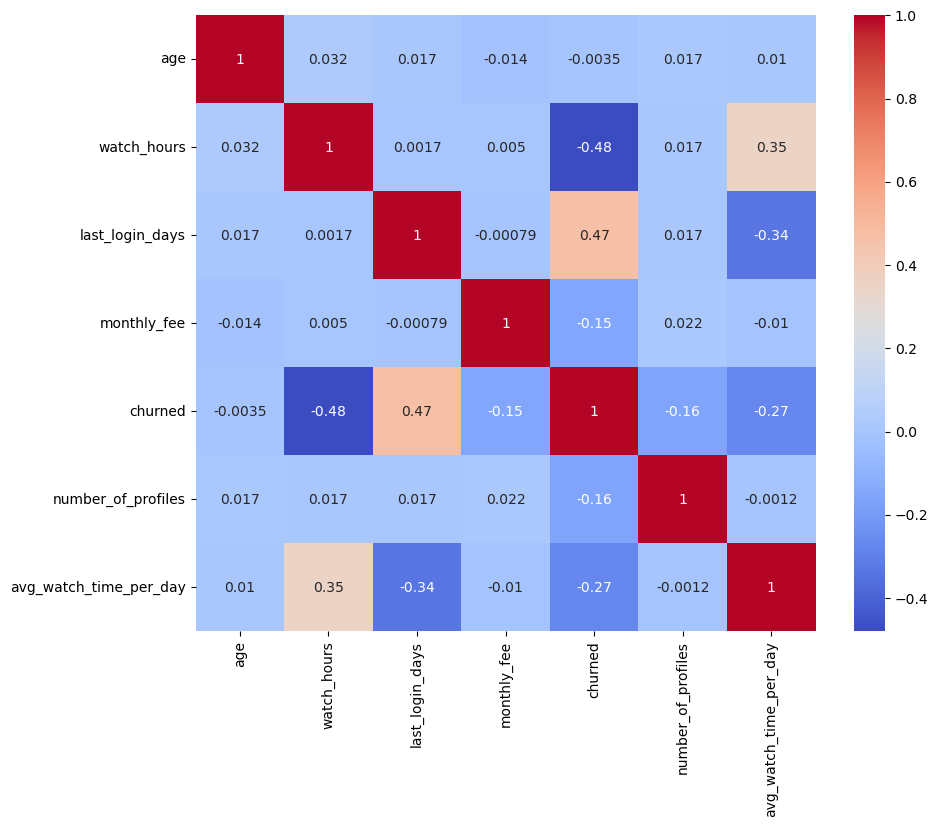

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm')

● Look for potential predictors of churn, e.g., watch_hours, last_login_days, monthly_fee.

In [29]:
cor['churned']

age                      -0.003515
watch_hours              -0.479916
last_login_days           0.471590
monthly_fee              -0.152117
churned                   1.000000
number_of_profiles       -0.158614
avg_watch_time_per_day   -0.272958
Name: churned, dtype: float64

***✅ Task 5: Insights & Recommendations***

Write 5–7 insights based on your analysis. For example:
● Are customers with lower watch hours more likely to churn?
● Do Premium users churn more or less than Basic users?
● Which region has the highest average watch_hours?

***💡 Insights***

1️⃣ Customers with lower watch_hours are more likely to churn
The correlation heatmap shows a negative correlation between watch_hours and churned.

Suggests that users who watch less content tend to leave more.

2️⃣ Premium users churn less than Basic users
From crosstab on subscription_type, churn rate is lower for Premium and higher for Basic.

Indicates Premium customers are more engaged and find higher value.

3️⃣ Users in North and West regions (example) have higher average watch_hours
Your groupby table shows certain regions (e.g., North) have higher engagement.

Marketing strategies can focus on low-engagement regions to improve retention.

4️⃣ Customers using credit cards (or auto-renewal payment methods) have lower churn
Payment method analysis showed lower churn for credit card users.

Suggests that auto-renew or seamless payment helps retain users.

5️⃣ Users who have higher avg_watch_time_per_day tend to stay
Favorite genre analysis showed differences in avg_watch_time_per_day.

Genres that lead to higher daily watch time may help keep customers engaged.

6️⃣ Users who log in recently are less likely to churn
Correlation analysis shows last_login_days positively correlates with churn.

Targeting inactive users with reminder emails or special offers can help reduce churn.

7️⃣ Higher monthly_fee slightly reduces churn
Negative correlation between monthly_fee and churned.

Possibly because higher-fee users are more invested or receive better features.



***💬 Recommendations***

✅ Promote content to low watch_hour users to increase engagement.
✅ Encourage auto-renewal payment methods.
✅ Offer loyalty or value perks to Basic plan users.
✅ Run campaigns targeting inactive users to bring them back.
✅ Focus marketing efforts on regions with low watch_hours.